# TempAtt FreeTapping

### Load & preprocess data

In [10]:
clear
clc
% close all

In [11]:
% define Paths: replace XXX by your own path
origDir = '/XXX/exp3/'; %!
addpath(genpath(origDir)); cd(origDir)

% load free tapping data
load([origDir 'free_tapp1.mat'])
TAPP1 = TAPP;
load([origDir 'free_tapp2.mat'])
TAPP2 = TAPP;

In [12]:
% preprocess data
TAPP = vertcat(TAPP1(:,:,:), TAPP2(:,:,:));
clear TAPP1 TAPP2
TAPP(:,:,1) = 1e3./TAPP(:,:,1); % in Hz
TAPP(:,:,2) = 1e2.*TAPP(:,:,2); % in % (std/mean*100)
TAPP(:,:,3) = 1e-3.*TAPP(:,:,3); % in sec

% define variable of interest
i0 = 1; % tapping in Hz (or 2- in percent (std/mean*100), or 3- in sec)
TAPP = TAPP(:,:,1);

% reorganise: fastest, spontaneous, slowest
TAPP = [ TAPP(:,2,:) TAPP(:,1,:) TAPP(:,3,:)];
size(TAPP)


ans =

    50     3



### Figure

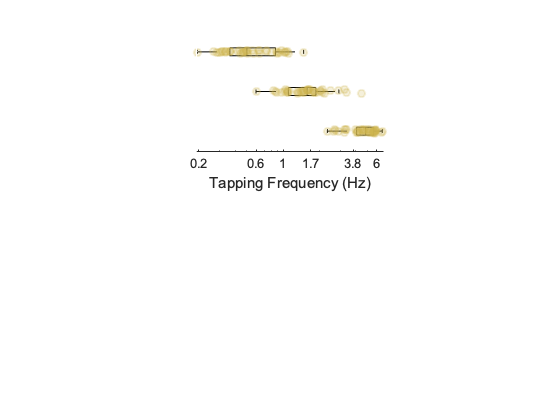

In [16]:
figure; set(gcf,'color','w'); colormap([.5 .5 .5; 1 1 1]); hold on
    subplot(2,2, 1.5);
    boxplot(TAPP,'orientation', 'horizontal','boxstyle','outline', 'colors','k', ...
        'OutlierSize',4, 'Symbol','', 'Widths',0.2)
    for i0 = 1:3   
    hold on
    scatter(TAPP(:,i0), ones(size(TAPP(:,i0))).*(i0+(rand(size(TAPP(:,i0)))-0.5)/10), ...
        'MarkerFaceColor',[.8 .7 .3],'MarkerEdgeColor',[.8 .7 .3],...
        'MarkerFaceAlpha',.2,'MarkerEdgeAlpha',.2)
        set(gca, 'FontSize', 10, 'FontName', 'Arial', 'YColor', [1 1 1])
        set(gca,'Layer','top','Box','off','TickLength',[.01 .01])
set(gca,'Layer','top','Box','off','TickLength',[.01 .01])
xlabel( 'Beat frequency (Hz)' )
   xticks( [.2 .6 1 1.7 3.8 6] )
    set(gca, 'XScale', 'log')
        xlim([.19, max(max(TAPP))+.1])
        xlabel( 'Tapping Frequency (Hz)' )
    end
clear hname i0 

% Print figure
cd(origDir)
% print('figure2b','-dpng','-r600')
f.PaperSize = [46.81 33.1];
f.PaperPosition(1:2) = [0 0];
print -dpdf figure2b.pdf

In [21]:
% compute mean & std of each condition: fastest, spontaneous, slowest
fprintf('Fastest: mean = %1.2f Hz, med = %1.2f Hz, std = %1.3f Hz \n', nanmean(TAPP(:,1)), quantile(TAPP(:,1),[.5]), nanstd(TAPP(:,1)))
fprintf('Spontaneous: mean = %1.2f Hz, med = %1.2f Hz, std = %1.3f Hz \n', nanmean(TAPP(:,2)), quantile(TAPP(:,2),[.5]), nanstd(TAPP(:,2)))
fprintf('Slowest: mean = %1.2f Hz, med = %1.2f Hz, std = %1.3f Hz \n', nanmean(TAPP(:,3)), quantile(TAPP(:,3),[.5]), nanstd(TAPP(:,3)))
 
% compare 3 conditions two-by-two: fastest, spontaneous, slowest
 [h,p,ci,stats] = ttest(TAPP(:,1),TAPP(:,2));
    bf = bftest(TAPP(:,1)-TAPP(:,2),'bic'); 
     fprintf('\nFastest vs  Spontaneous:  t = %1.2f ,df = %1.2f , p = %1.2f \n',stats.tstat,stats.df, p)
[h,p,ci,stats] = ttest(TAPP(:,1),TAPP(:,3));
    bf = bftest(TAPP(:,1)-TAPP(:,3),'bic'); 
     fprintf('Fastest vs  Slowest:      t = %1.2f ,df = %1.2f , p = %1.2f \n',stats.tstat,stats.df, p)
[h,p,ci,stats] = ttest(TAPP(:,2),TAPP(:,3));
    bf = bftest(TAPP(:,2)-TAPP(:,3),'bic'); 
     fprintf('Spontaneous vs. Slowest:  t = %1.2f ,df = %1.2f , p = %1.2f \n',stats.tstat,stats.df, p)
     

Fastest: mean = 4.69 Hz, med = 4.84 Hz, std = 1.130 Hz 
Spontaneous: mean = 1.67 Hz, med = 1.58 Hz, std = 0.744 Hz 
Slowest: mean = 0.60 Hz, med = 0.50 Hz, std = 0.299 Hz 

Fastest vs  Spontaneous:  t = 14.82 ,df = 42.00 , p = 0.00 
Fastest vs  Slowest:      t = 21.52 ,df = 42.00 , p = 0.00 
Spontaneous vs. Slowest:  t = 11.25 ,df = 42.00 , p = 0.00 
